In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
import pickle

In [2]:
# Ler CSV
df = pd.read_csv("datasets/fogos_tratados1.csv")

In [3]:
df

,Mes,Dia,Hora,ClasseArea,DSR,FWI,ISI,DC,DMC,FFMC,BUI,AreaVegetacao,D0,D1,D2,D3,D4,AlturaDia,E1
0,1,21,16,0,0.231181,3.350239,5.077259,17.290907,2.523690,83.231734,3.698021,233.07,0,0,0,1,1,1,0
1,1,21,19,1,0.008510,0.518678,1.687791,5.211538,1.826182,72.712584,1.946860,40.35,0,0,1,1,0,0,0
2,1,22,8,2,0.020193,0.845105,2.802833,6.033748,1.457928,75.871469,1.817783,138.88,0,1,0,0,1,1,0
3,1,22,14,0,0.117643,2.287284,4.515505,6.479930,1.942772,81.878980,2.220902,40.35,0,0,1,1,0,1,0
4,1,22,14,0,0.251856,3.516353,5.827495,8.119656,2.509288,84.333217,2.831200,40.35,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43368,12,19,18,0,0.091358,1.982785,2.707907,132.938895,3.472617,83.756453,6.519480,70.13,0,1,0,1,1,1,0
43369,12,19,18,0,0.133738,2.459144,3.319203,36.855404,3.558163,83.347550,5.732687,138.88,0,1,0,0,1,1,0
43370,12,19,19,1,0.093070,2.003688,2.988052,45.713544,3.124691,82.841269,5.337318,138.88,0,1,0,0,1,0,0
43371,12,19,19,0,0.169065,2.807352,3.457118,49.611360,3.880769,84.216379,6.491977,40.35,0,0,1,1,0,0,0


In [4]:
df = df.drop(labels=['D0', 'D1', 'D2', 'D3', 'D4', 'AlturaDia', 'E1'], axis=1)

In [5]:
df

,Mes,Dia,Hora,ClasseArea,DSR,FWI,ISI,DC,DMC,FFMC,BUI,AreaVegetacao
0,1,21,16,0,0.231181,3.350239,5.077259,17.290907,2.523690,83.231734,3.698021,233.07
1,1,21,19,1,0.008510,0.518678,1.687791,5.211538,1.826182,72.712584,1.946860,40.35
2,1,22,8,2,0.020193,0.845105,2.802833,6.033748,1.457928,75.871469,1.817783,138.88
3,1,22,14,0,0.117643,2.287284,4.515505,6.479930,1.942772,81.878980,2.220902,40.35
4,1,22,14,0,0.251856,3.516353,5.827495,8.119656,2.509288,84.333217,2.831200,40.35
...,...,...,...,...,...,...,...,...,...,...,...,...
43368,12,19,18,0,0.091358,1.982785,2.707907,132.938895,3.472617,83.756453,6.519480,70.13
43369,12,19,18,0,0.133738,2.459144,3.319203,36.855404,3.558163,83.347550,5.732687,138.88
43370,12,19,19,1,0.093070,2.003688,2.988052,45.713544,3.124691,82.841269,5.337318,138.88
43371,12,19,19,0,0.169065,2.807352,3.457118,49.611360,3.880769,84.216379,6.491977,40.35


In [6]:
#df.to_csv('datasets/fogos_tratados2.csv', index=False)

In [7]:
df = pd.read_csv('datasets/fogos_tratados2.csv')

In [8]:
df

,Mes,Dia,Hora,ClasseArea,DSR,FWI,ISI,DC,DMC,FFMC,BUI,AreaVegetacao
0,1,21,16,0,0.231181,3.350239,5.077259,17.290907,2.523690,83.231734,3.698021,233.07
1,1,21,19,1,0.008510,0.518678,1.687791,5.211538,1.826182,72.712584,1.946860,40.35
2,1,22,8,2,0.020193,0.845105,2.802833,6.033748,1.457928,75.871469,1.817783,138.88
3,1,22,14,0,0.117643,2.287284,4.515505,6.479930,1.942772,81.878980,2.220902,40.35
4,1,22,14,0,0.251856,3.516353,5.827495,8.119656,2.509288,84.333217,2.831200,40.35
...,...,...,...,...,...,...,...,...,...,...,...,...
43368,12,19,18,0,0.091358,1.982785,2.707907,132.938895,3.472617,83.756453,6.519480,70.13
43369,12,19,18,0,0.133738,2.459144,3.319203,36.855404,3.558163,83.347550,5.732687,138.88
43370,12,19,19,1,0.093070,2.003688,2.988052,45.713544,3.124691,82.841269,5.337318,138.88
43371,12,19,19,0,0.169065,2.807352,3.457118,49.611360,3.880769,84.216379,6.491977,40.35


In [9]:
df['FWI'].max()

76.1546760749124

In [10]:
# Creating Arrays for the Features and the Response Variable
target_column = ['ClasseArea'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()

In [11]:
# Creating the Training and Test Datasets
X = df[predictors].values
y = df[target_column].values

In [12]:
# SMOTE
sm = SMOTE(random_state=2022)
X, y = sm.fit_resample(X, y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.25, random_state=2022) # 25% para teste, 75% para treino

In [14]:
0.083333*12

0.9999960000000001

In [15]:
df

,Mes,Dia,Hora,ClasseArea,DSR,FWI,ISI,DC,DMC,FFMC,BUI,AreaVegetacao
0,0.083333,0.677419,0.695652,0,0.003970,0.043993,0.174063,0.011117,0.003554,0.845508,0.005226,0.688477
1,0.083333,0.677419,0.826087,1,0.000146,0.006811,0.057862,0.003351,0.002572,0.738649,0.002751,0.119192
2,0.083333,0.709677,0.347826,2,0.000347,0.011097,0.096089,0.003879,0.002053,0.770739,0.002569,0.410244
3,0.083333,0.709677,0.608696,0,0.002020,0.030035,0.154805,0.004166,0.002736,0.831766,0.003139,0.119192
4,0.083333,0.709677,0.608696,0,0.004325,0.046174,0.199784,0.005220,0.003534,0.856697,0.004001,0.119192
...,...,...,...,...,...,...,...,...,...,...,...,...
43368,1.000000,0.612903,0.782609,0,0.001569,0.026036,0.092835,0.085472,0.004891,0.850838,0.009213,0.207160
43369,1.000000,0.612903,0.782609,0,0.002297,0.032291,0.113792,0.023696,0.005011,0.846684,0.008101,0.410244
43370,1.000000,0.612903,0.826087,1,0.001598,0.026311,0.102439,0.029391,0.004401,0.841541,0.007543,0.410244
43371,1.000000,0.612903,0.826087,0,0.002903,0.036864,0.118520,0.031897,0.005466,0.855510,0.009174,0.119192


In [16]:
df.iloc[40332]

Mes              0.666667
Dia              0.193548
Hora             0.521739
ClasseArea       3.000000
DSR              0.280094
FWI              0.487239
ISI              0.332242
DC               0.371355
DMC              0.189927
FFMC             0.948170
BUI              0.240666
AreaVegetacao    0.207160
Name: 40332, dtype: float64

In [17]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=2022)
clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=2022)

In [18]:
predictions = clf.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, predictions)
print('Accuracy =', round(accuracy*100, 2), '%')

Accuracy = 94.78 %


In [28]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      9436
           1       0.90      0.91      0.91      9263
           2       0.94      0.97      0.95      9392
           3       0.99      1.00      1.00      9344
           4       0.99      1.00      1.00      9378

    accuracy                           0.95     46813
   macro avg       0.95      0.95      0.95     46813
weighted avg       0.95      0.95      0.95     46813



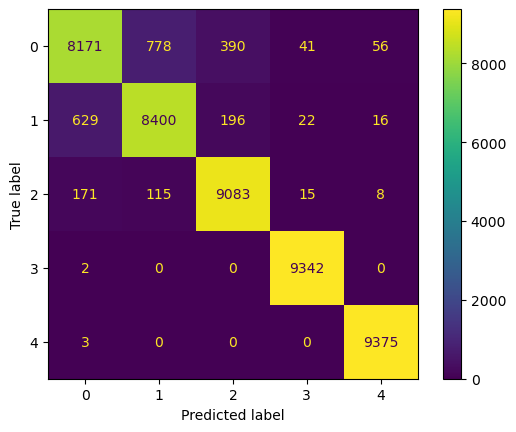

In [20]:
# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=clf.classes_)
disp.plot()
plt.show()

In [21]:
# Save the clf
#with open ('saved_clf/extremely_classifier.pkl', 'wb') as fid:
#    pickle.dump(clf, fid)

In [22]:
# Load the classifier
with open('saved_clf/extremely_classifier.pkl', 'rb') as fid:
    clf_loaded = pickle.load(fid)

In [23]:
X_test[0]

array([0.22069525, 0.25352603, 0.46247761, 0.58765121, 0.43570708,
       0.34343161, 0.26012618, 0.62366851, 0.41537146, 0.60836564,
       0.96098939])

In [24]:
0.26012618*df['AreaVegetacao'].max()

0.26012618

In [25]:
clf_loaded.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
previsao = clf_loaded.predict([[0.25352603, 0.34343161, 0.22069525, 0.96098939, 0.43570708,
       0.41537146, 0.62366851, 0.58765121, 0.46247761, 0.60836564,
       0.26012618]])

print('Prediction of a Severity', previsao[0])

Prediction of a Severity 3


In [27]:
df['ClasseArea'].value_counts()

0    37450
1     3930
2     1692
3      157
4      144
Name: ClasseArea, dtype: int64